In [2]:
## Movie Genre Classification

In [ ]:
# import Libreries


In [3]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\badal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
#Data Loading & Parsing
# Load Train Data

import pandas as pd

train_path = "C:/Workspace/project/Genre classification/train_data.txt/train_data.txt"
train_df=pd.read_csv(
    train_path,
    sep=' ::: ',
    names=["Title","Genre","Description"],
    engine="python"
    
)

In [5]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
# Load test data

test_path="C:/Workspace/project/Genre classification/test_data.txt/test_data.txt"
test_df=pd.read_csv(
    test_path,
    sep=' ::: ',
    names=["Title","Description"],
    engine="python"
)

In [ ]:
#3. Exploratory Data Analysis (EDA)

In [7]:
train_df.describe()


,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy o...
freq,1,13613,12


In [11]:
train_df['Genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [12]:
# flatten multi‑genre into single rows
all_genres = train_df['Genre'].str.split(',').explode()
print(all_genres.value_counts())


Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [18]:
# Missing Values
train_df.isna().sum()


Title          0
Genre          0
Description    0
desc_len       0
dtype: int64

In [17]:
train_df['desc_len'] = train_df['Description'].str.split().apply(len)
train_df['desc_len'].describe()


count    54214.000000
mean       101.907386
std         76.579192
min          6.000000
25%         55.000000
50%         79.000000
75%        121.000000
max       1829.000000
Name: desc_len, dtype: float64

In [19]:
train_df

,Title,Genre,Description,desc_len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,92
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,32
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,114
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,192
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,106
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,85
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,131
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",48
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,119


In [ ]:
# Preprocessing


In [22]:
#Encode Multi-lable genres
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(train_df['Genre'].str.split(','))

In [28]:
# Text Vectorization
'''converting raw text descriptions into numerical features using TF-IDF (Term Frequency–Inverse Document Frequency), 
which is a common technique to represent text for machine learning.'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1,2)
)
X = tfidf.fit_transform(train_df['Description'])

In [26]:
# MODEL TRAINING & VALIDATION

In [39]:
#train-validation split
from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [43]:
# Train a Multi Label Classifier

'''What is a Classifier?
A classifier is a machine learning model that assigns input data to one or more categories or classes.

Binary classification: Two classes (e.g., spam vs. not spam).

Multiclass classification: More than two mutually exclusive classes (e.g., cat, dog, bird).

Multilabel classification: Each sample can belong to multiple classes at once (e.g., a movie that is both Action and Comedy).

⚖️ One-vs-One vs. One-vs-Rest
These are strategies for adapting binary classifiers (like Logistic Regression or SVM) to multiclass or multilabel problems.

✅ One-vs-Rest (OvR or One-vs-All)
Trains one classifier per class.

Each classifier predicts: "Is this sample in class X?"

Works for multiclass and multilabel.

✅ Used when:

You have many independent labels (like movie genres).

You want probabilities or interpretability.

Example: Movie Genres (Multilabel)
If you have genres: ["Action", "Drama", "Comedy"], you'll train:

One classifier for "Action vs not Action"

One for "Drama vs not Drama"

One for "Comedy vs not Comedy"

So a movie can be [1, 0, 1] → Action + Comedy

✅ Your current model uses One-vs-Rest, which is the correct choice for multilabel genre classification.

🔄 One-vs-One (OvO)
Trains one classifier for every pair of classes.

Total models: n_classes * (n_classes - 1) / 2

Each classifier votes, and the class with most votes wins.

✅ Used mainly for multiclass problems with few labels (like digit recognition 0–9).
🚫 Not used for multilabel tasks.'''

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'))
model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 max_iter=1000))

In [44]:
# Evaluate on Validation Set
'''classification_report(...):-Gives precision, recall, and F1-score per genre.
   target_names=mlb.classes_ maps the binary columns back to genre names (like "Action", "Comedy", etc.).

   hamming_loss(...):-Measures the average fraction of labels that are incorrectly predicted (both false positives and false negatives).

Lower = better.

Range: 0 (perfect) to 1 (completely wrong).
   '''

from sklearn.metrics import classification_report, hamming_loss

y_val_pred = model.predict(x_val)
print(classification_report(y_val, y_val_pred, target_names=mlb.classes_, zero_division=0))
print("Hamming Loss:", hamming_loss(y_val,y_val_pred))

              precision    recall  f1-score   support

      action       0.20      0.70      0.32       263
       adult       0.28      0.72      0.40       112
   adventure       0.11      0.49      0.19       139
   animation       0.14      0.46      0.22       104
   biography       0.04      0.13      0.06        61
      comedy       0.40      0.76      0.53      1443
       crime       0.10      0.43      0.17       107
 documentary       0.68      0.85      0.76      2659
       drama       0.53      0.78      0.63      2697
      family       0.12      0.53      0.19       150
     fantasy       0.08      0.26      0.12        74
   game-show       0.41      0.75      0.53        40
     history       0.06      0.22      0.09        45
      horror       0.40      0.82      0.54       431
       music       0.33      0.83      0.47       144
     musical       0.09      0.34      0.14        50
     mystery       0.08      0.36      0.14        56
        news       0.10    

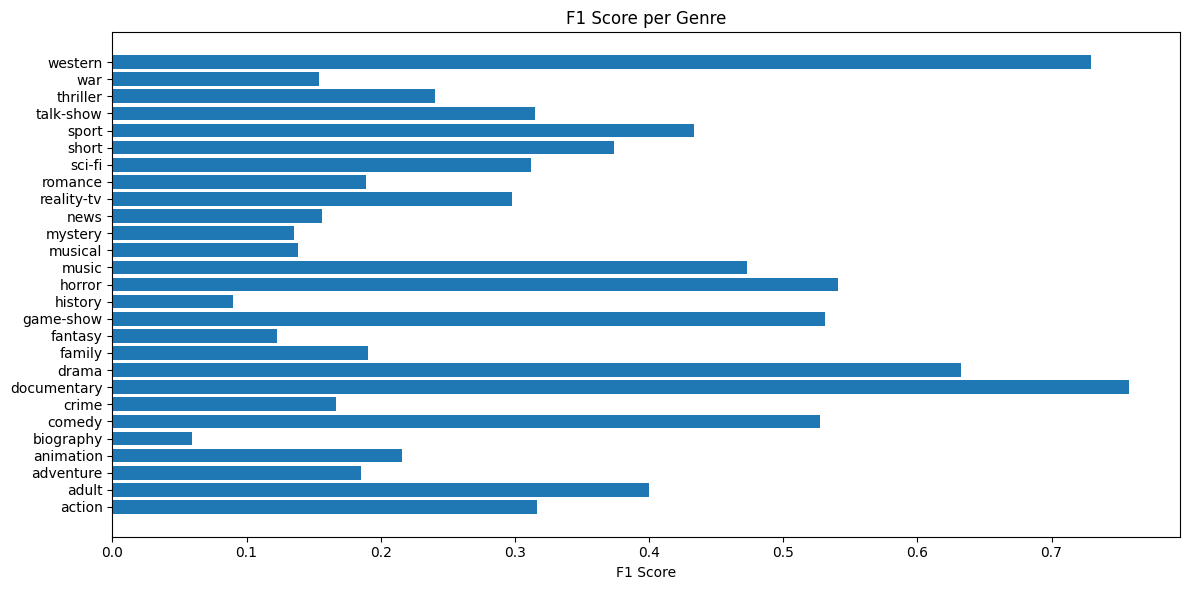

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred)

plt.figure(figsize=(12, 6))
plt.barh(mlb.classes_, f1)
plt.xlabel('F1 Score')
plt.title('F1 Score per Genre')
plt.tight_layout()
plt.show()


In [50]:
coefs = model.estimators_[0].coef_[0]
feat_names = tfidf.get_feature_names_out()
top_positive = feat_names[coefs.argsort()[-10:]]
print("Top positive terms for genre:", mlb.classes_[0], top_positive)


Top positive terms for genre: action ['singh' 'skills' 'assassin' 'revenge' 'martial' 'rescue' 'protect'
 'fight' 'gangsters' 'action']
